In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Here 158 rows and 12 cloumns are present. where happiness score is target variable and other 11 are features(independent variables).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Three types of data types are present here(object, int64 and float64).

In [5]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

NO null values are present in the data.

In [6]:
df.duplicated().sum()

0

There are no duplicate values prensent in the data.

In [7]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


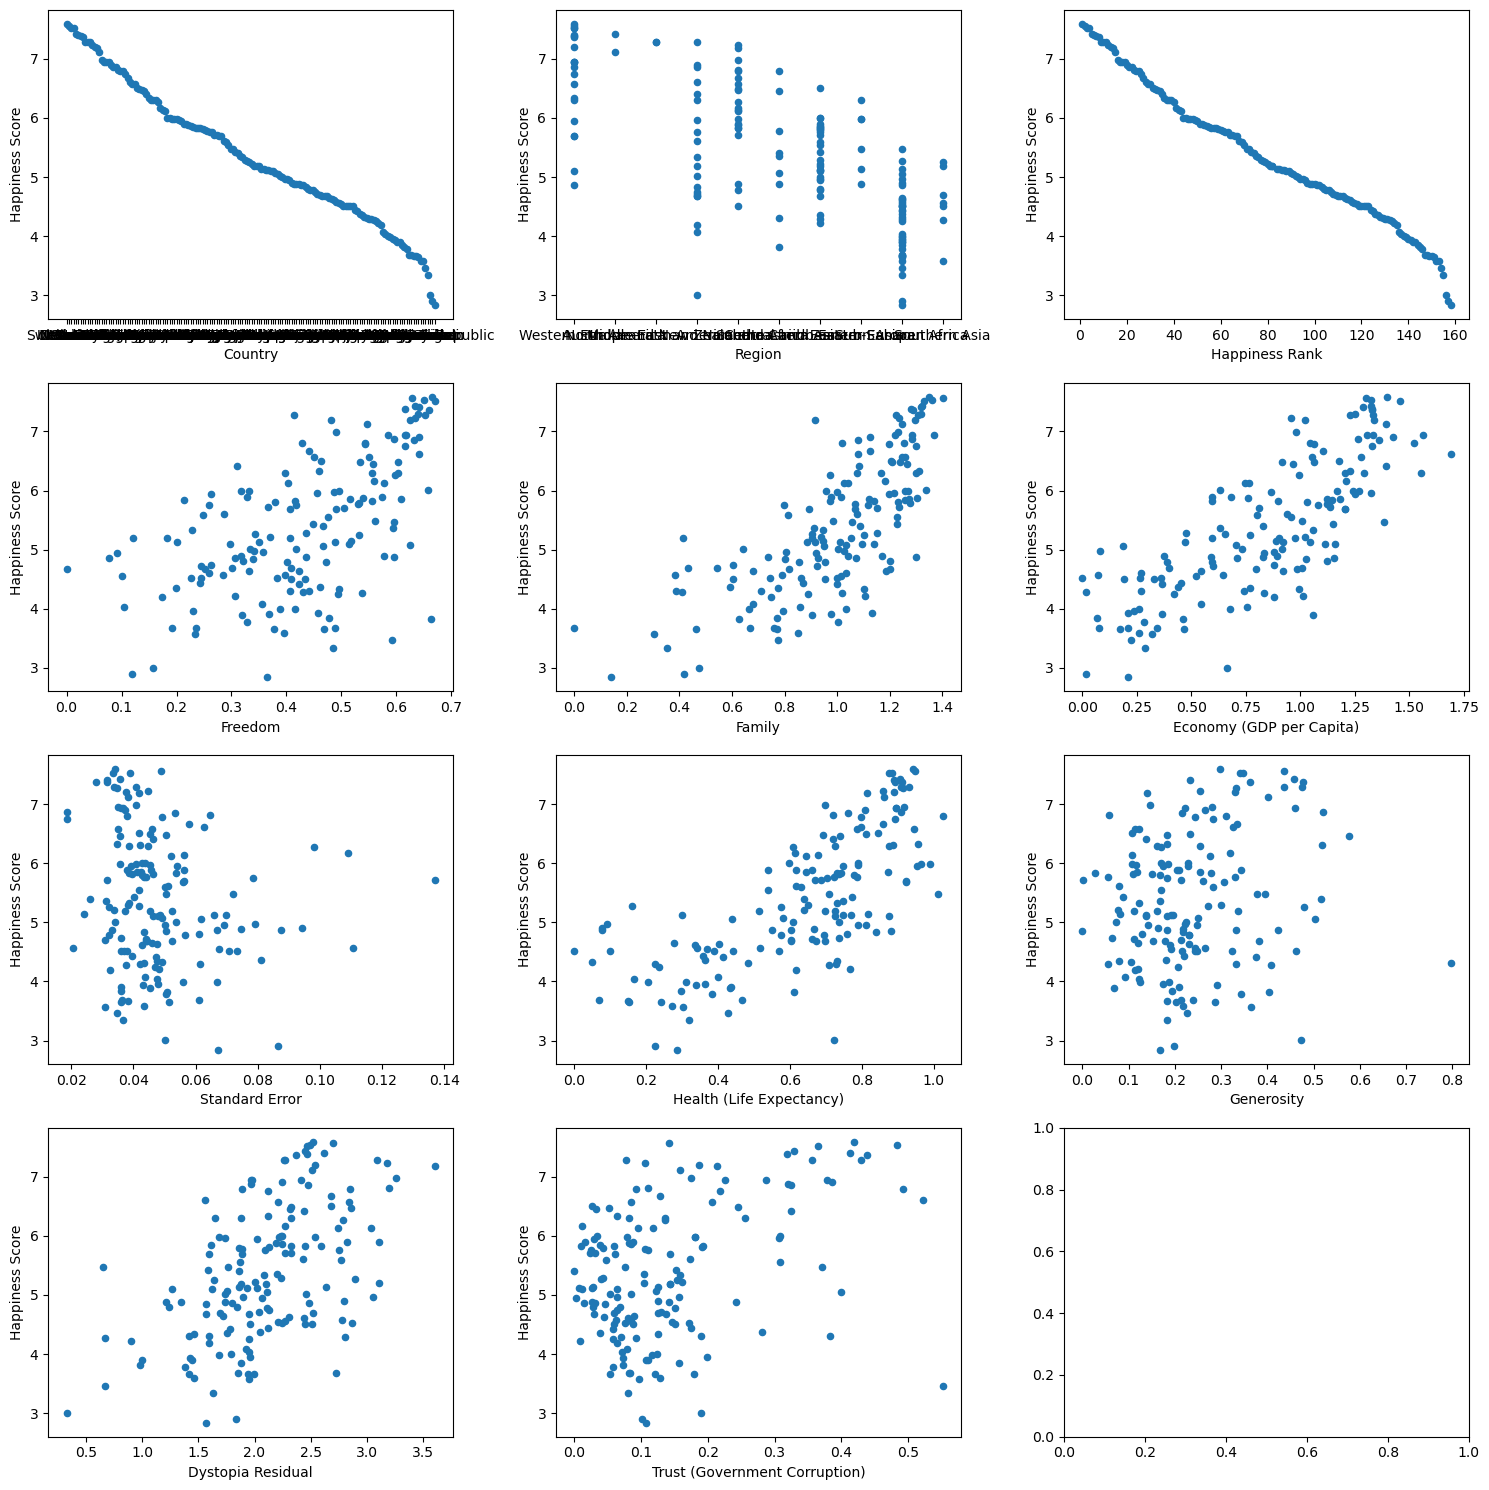

In [16]:
# visualizing the relationship between the features and the response using scatterplots 
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

df.plot(kind='scatter', x='Country', y='Happiness Score', ax=axs[0, 0])
df.plot(kind='scatter', x='Region', y='Happiness Score', ax=axs[0, 1]) 
df.plot(kind='scatter', x='Happiness Rank', y='Happiness Score', ax=axs[0, 2])
df.plot(kind='scatter', x='Freedom', y='Happiness Score', ax=axs[1, 0])
df.plot(kind='scatter', x='Family', y='Happiness Score', ax=axs[1, 1])
df.plot(kind='scatter', x='Economy (GDP per Capita)', y='Happiness Score', ax=axs[1, 2])
df.plot(kind='scatter', x='Standard Error', y='Happiness Score', ax=axs[2, 0])
df.plot(kind='scatter', x='Health (Life Expectancy)', y='Happiness Score', ax=axs[2, 1])
df.plot(kind='scatter', x='Generosity', y='Happiness Score', ax=axs[2, 2])
df.plot(kind='scatter', x='Dystopia Residual', y='Happiness Score', ax=axs[3, 0])
df.plot(kind='scatter', x='Trust (Government Corruption)', y='Happiness Score', ax=axs[3, 1])

plt.tight_layout()
plt.show()

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between almost all the features and the Happiness score is almost a linear one.

In [17]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


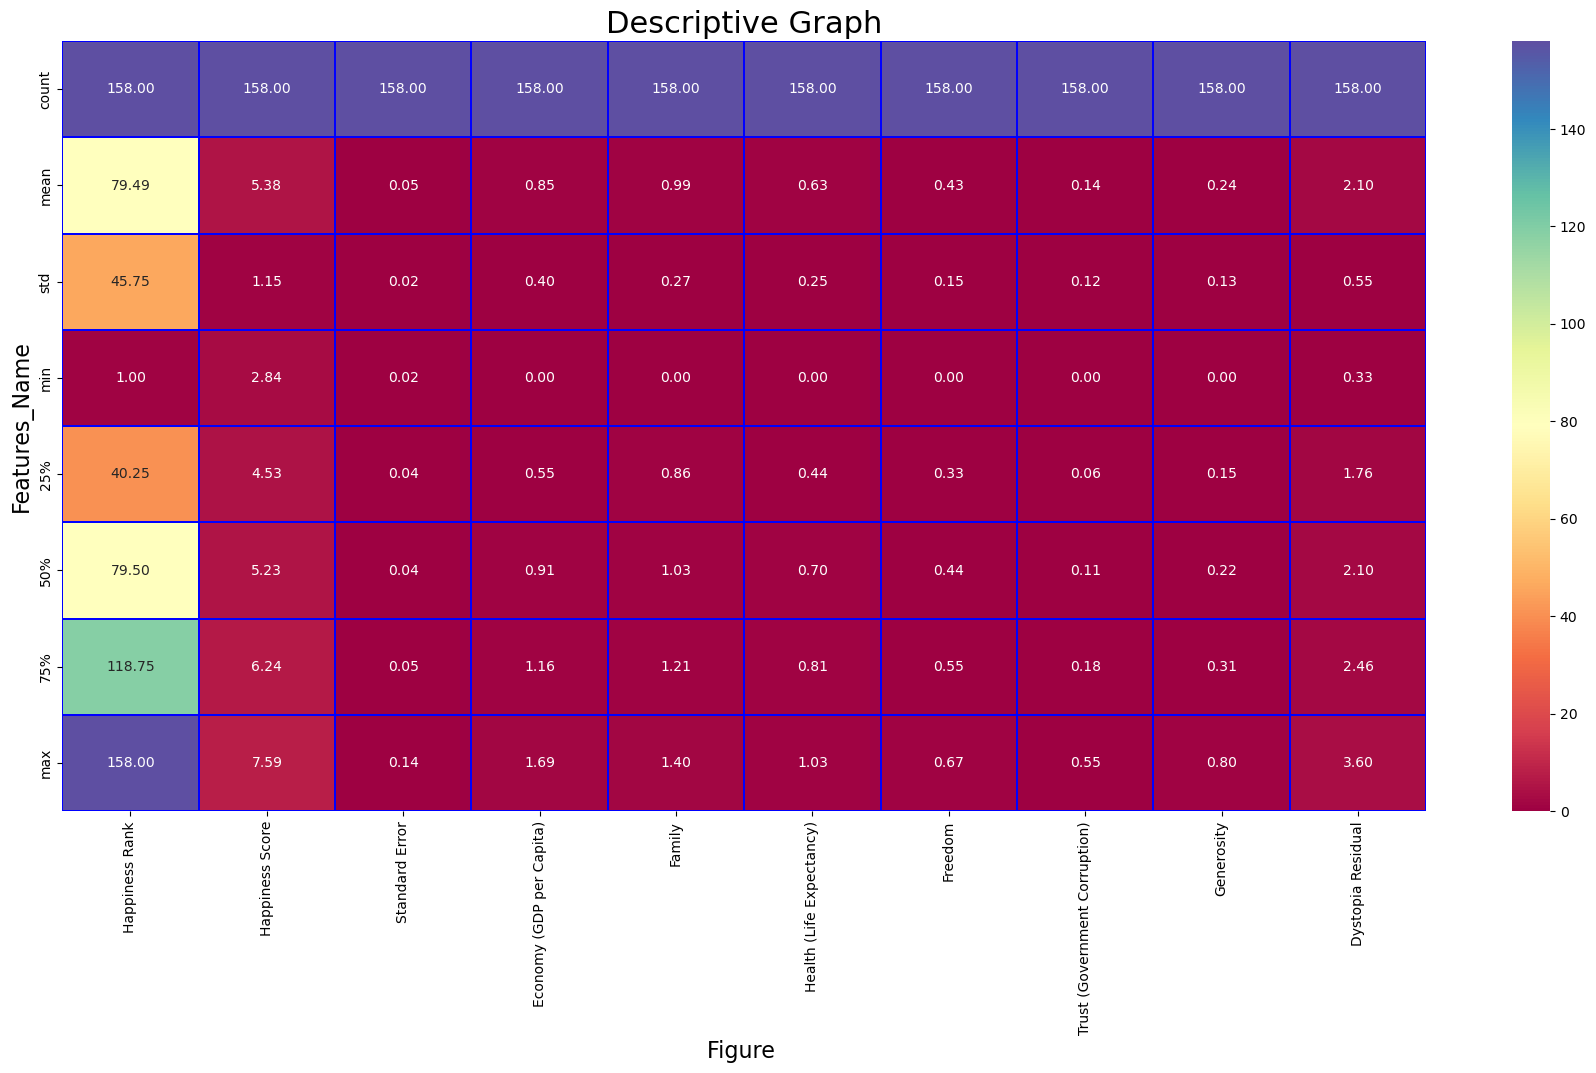

In [19]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2,linecolor="blue", cmap= 'Spectral') 
plt.xlabel('Figure ', fontsize=16)
plt.ylabel('Features_Name', fontsize=16)
plt.title('Descriptive Graph', fontsize=22)
plt.show()

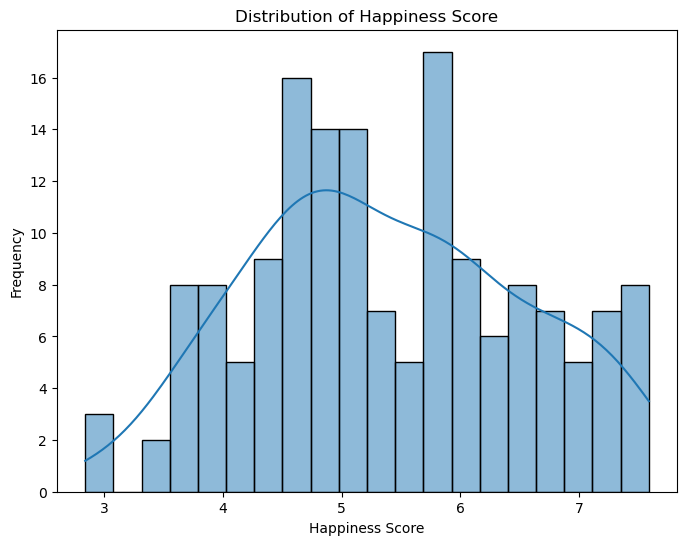

In [21]:
# Histogram for Happiness Score
plt.figure(figsize=(8, 6))
sns.histplot(df['Happiness Score'], bins=20, kde=True)
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Here we can observe that freedom has a linear relationshiop with happiness score.

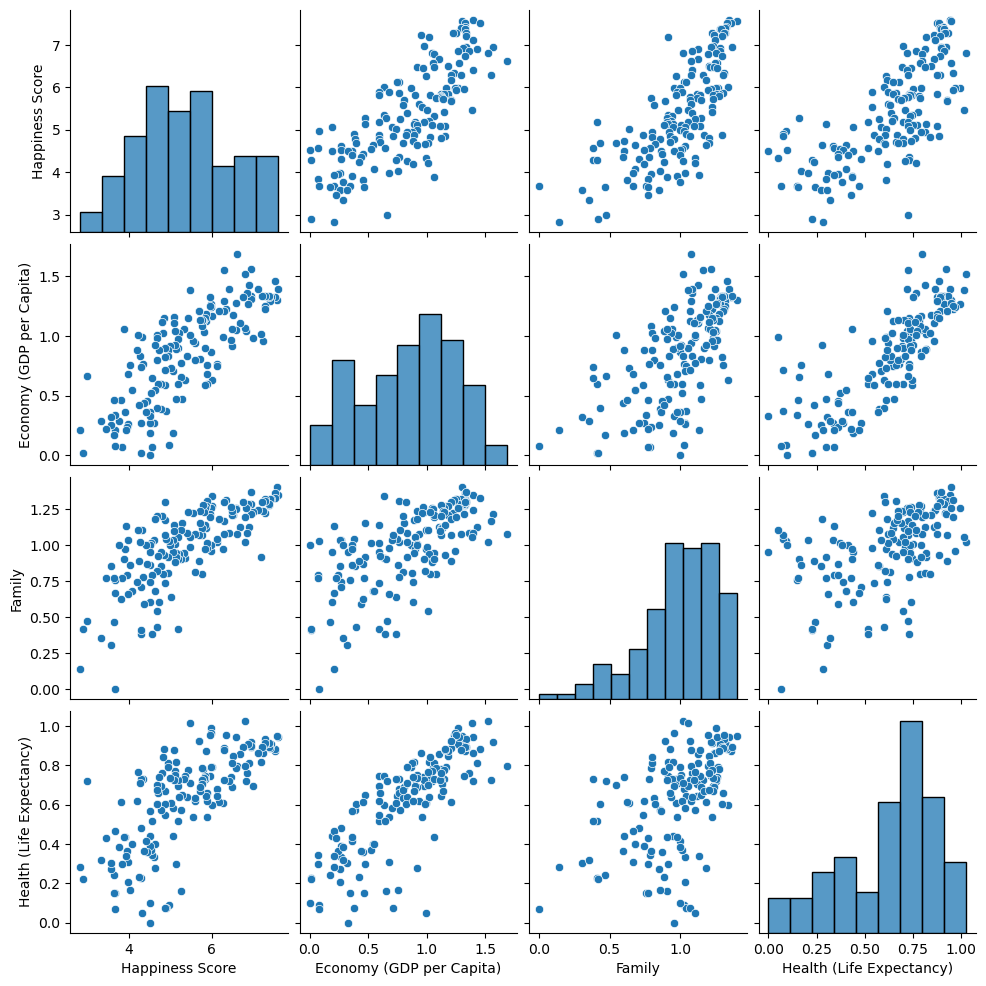

In [24]:
# Pair Plot for selected variables
selected = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']
sns.pairplot(df[selected])
plt.show()


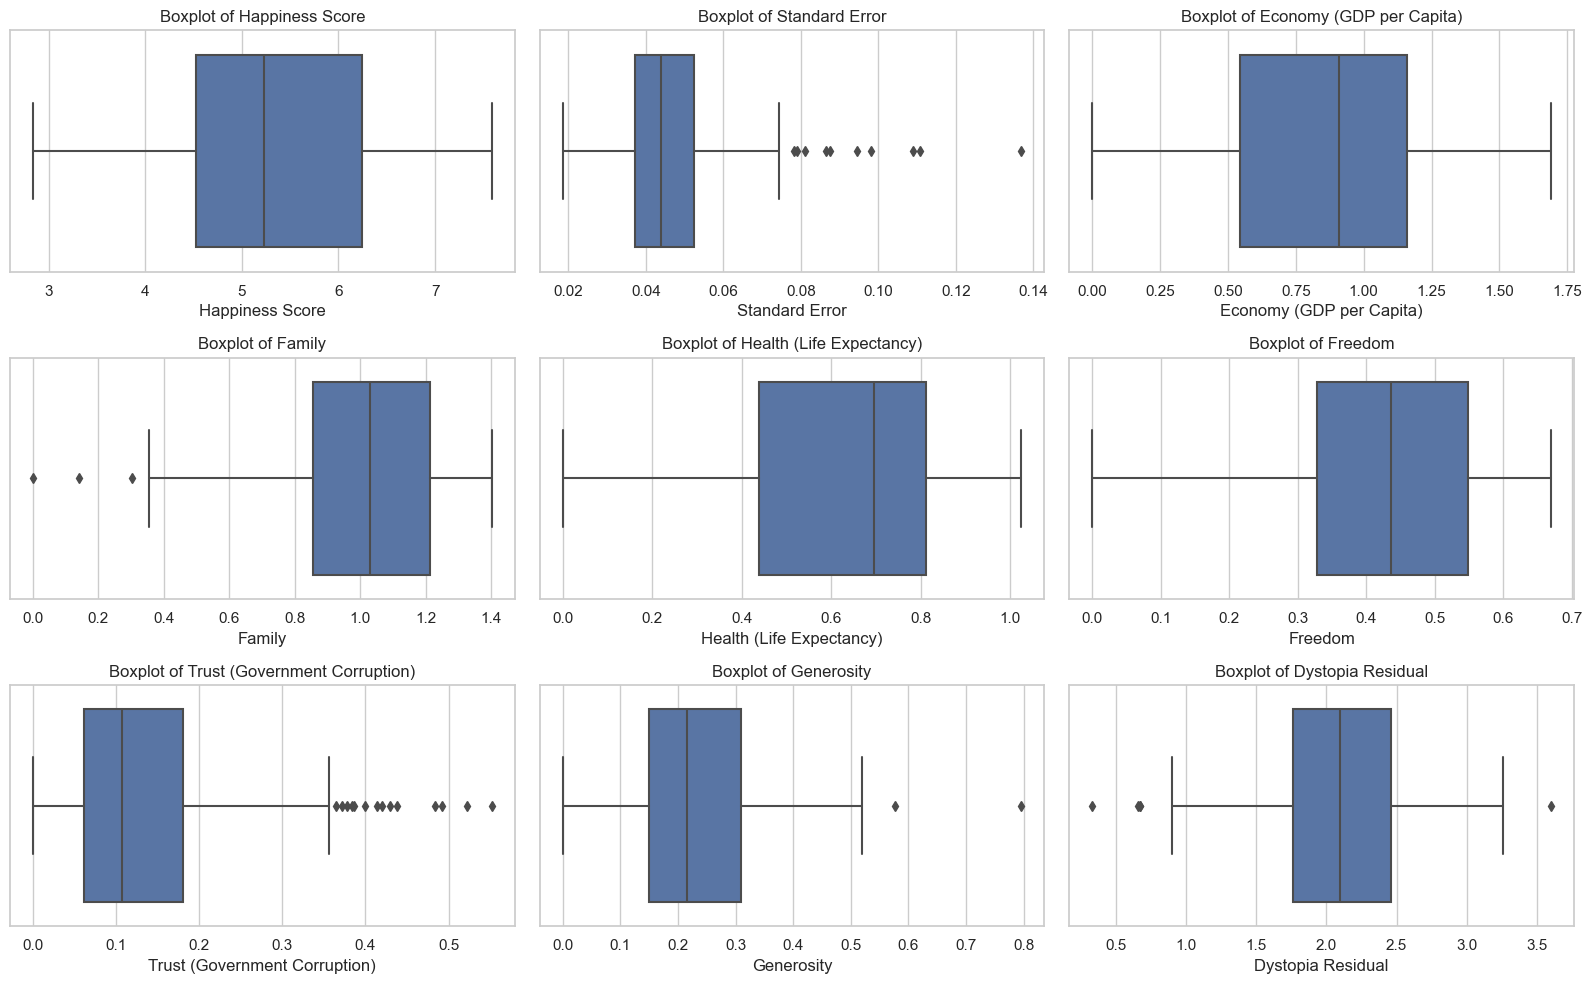

In [28]:
# checking the outliers by plotting boxplot
numerical_columns = ['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 
                     'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
                     'Generosity', 'Dystopia Residual']

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

for column in numerical_columns:
    plt.subplot(3, 3, numerical_columns.index(column) + 1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


There are outliers present in the Standard Error,Family,Trust,generosity and Dystopia Residual columns. So, we will try to deal with them.

In [32]:
outliers = ['Standard Error', 'Family', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Removing outliers based on IQR
for column in outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the upper and lower limits for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Removing outliers
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]



As we have removed outliers from the data we will check skewness now.

In [33]:
df.skew() #normal range is -0.5 to +0.5

Happiness Rank                  -0.102708
Happiness Score                  0.269713
Standard Error                   0.381226
Economy (GDP per Capita)        -0.415803
Family                          -0.649702
Health (Life Expectancy)        -0.659100
Freedom                         -0.351080
Trust (Government Corruption)    0.633125
Generosity                       0.341084
Dystopia Residual                0.181781
dtype: float64

so we have skewness in 3 columns(family,health and trust)

In [34]:
# removing skewness using cuberoot method
df['Family'] = np.cbrt(df['Family'])

df['Health (Life Expectancy)'] = np.cbrt(df['Health (Life Expectancy)'])

df['Trust (Government Corruption)'] = np.cbrt(df['Trust (Government Corruption)'])

In [35]:
df.skew()

Happiness Rank                  -0.102708
Happiness Score                  0.269713
Standard Error                   0.381226
Economy (GDP per Capita)        -0.415803
Family                          -1.115254
Health (Life Expectancy)        -1.345005
Freedom                         -0.351080
Trust (Government Corruption)   -0.305088
Generosity                       0.341084
Dystopia Residual                0.181781
dtype: float64

In [44]:
from scipy.stats import boxcox

# Applying Box-Cox transformation
skewed_columns = ['Health (Life Expectancy)', 'Family']

for column in skewed_columns:
    df[column], _ = boxcox(df[column] + 1)
    

In [45]:
df.skew()

Happiness Rank                  -0.102708
Happiness Score                  0.269713
Standard Error                   0.381226
Economy (GDP per Capita)        -0.415803
Family                          -0.172450
Health (Life Expectancy)        -0.314723
Freedom                         -0.351080
Trust (Government Corruption)   -0.305088
Generosity                       0.341084
Dystopia Residual                0.181781
dtype: float64

We have removed skewness.

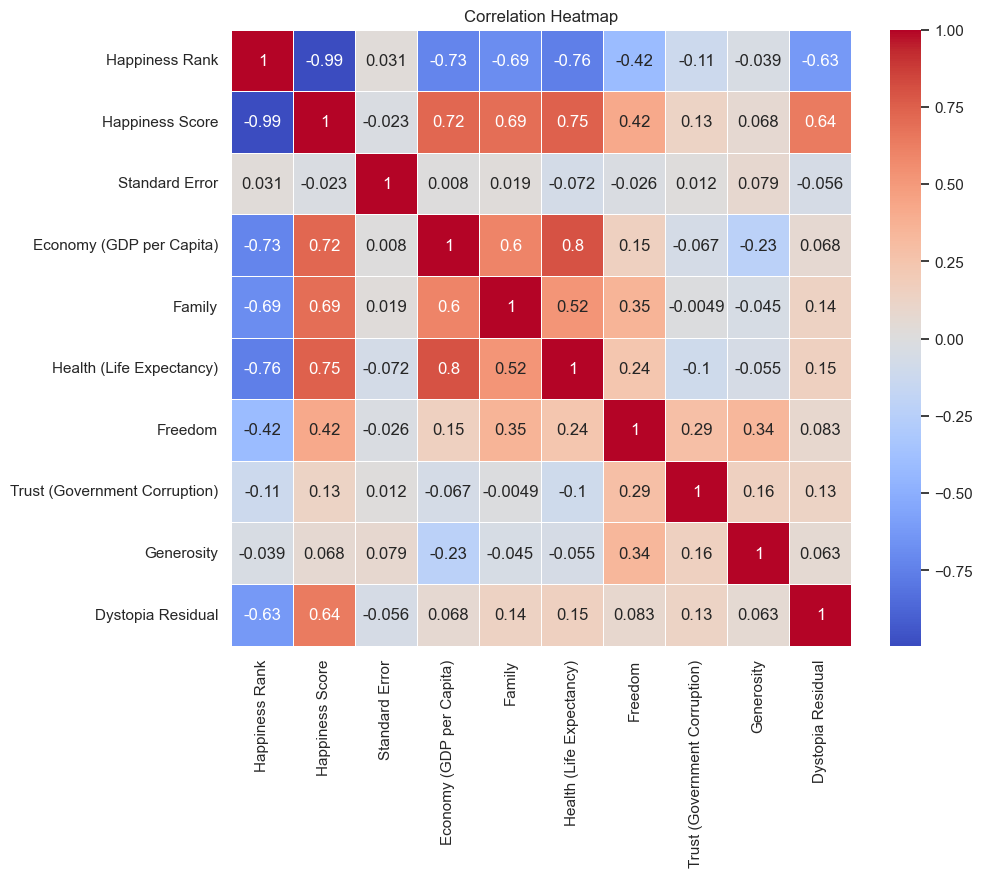

In [47]:
# Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

As, we can see Happiness Rank is highly corelated with Happiness score.
Similarly, Economy(GDP per capita), family,health(life expectancy) are also highly correlated with label happiness score.

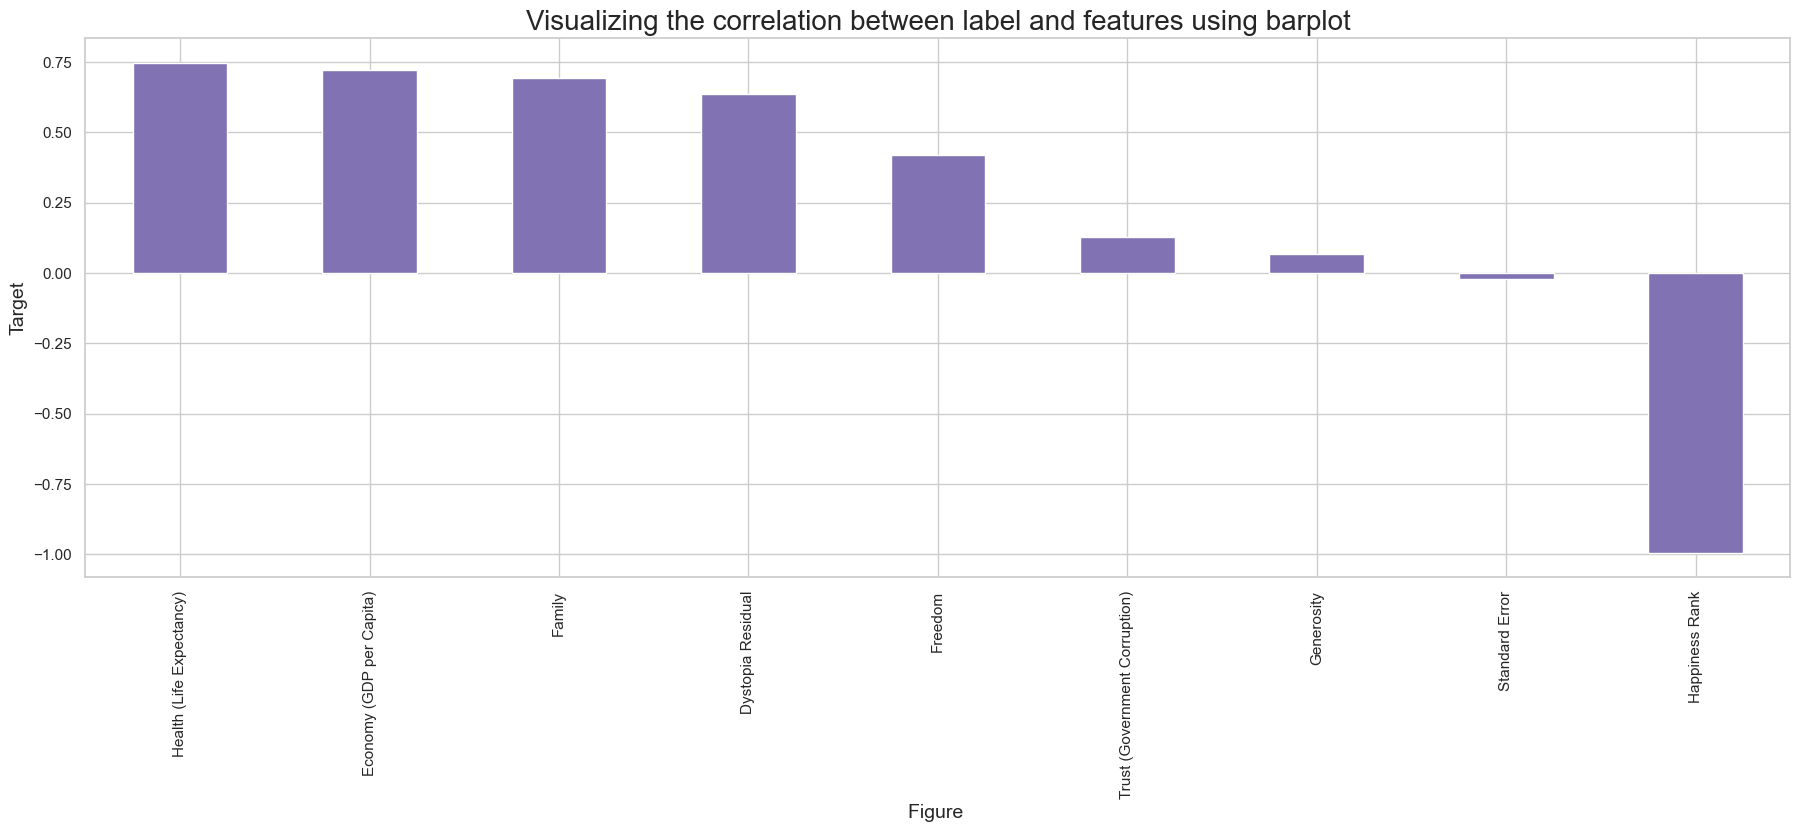

In [53]:
plt.figure(figsize=(22,7))
df.corr()['Happiness Score'].sort_values(ascending = False).drop(['Happiness Score']).plot(kind='bar',color='m')
plt.xlabel('Figure ', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Visualizing the correlation between label and features using barplot', fontsize=20)
plt.show()

In [67]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform (df[i].values.reshape(-1, 1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,42.0,8.0,2,7.561,0.04884,1.30232,2.141408e+07,222919.090140,0.62877,0.521036,0.43630,2.70201
10,46.0,3.0,11,7.278,0.03470,1.22857,1.659514e+07,211254.305149,0.41319,0.426992,0.33172,3.08854
11,25.0,2.0,12,7.226,0.04454,0.95578,1.695076e+07,193292.789335,0.63376,0.473009,0.25497,3.17728
12,5.0,8.0,13,7.200,0.03751,1.33723,1.849933e+07,203328.693950,0.62433,0.571603,0.33088,2.53320
14,100.0,4.0,15,7.119,0.03839,1.39451,1.718806e+07,193794.560298,0.54604,0.541637,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...,...,...,...
148,18.0,7.0,149,3.667,0.03830,0.34193,6.864946e+06,16261.204971,0.23501,0.374895,0.18386,1.94296
149,39.0,7.0,150,3.656,0.03590,0.17417,2.796392e+06,31063.497353,0.37725,0.495140,0.28657,1.99172
150,48.0,7.0,151,3.655,0.05141,0.46534,7.040890e+06,16520.043493,0.46866,0.563805,0.20165,1.41723
151,15.0,7.0,152,3.587,0.04324,0.25812,8.460133e+06,36839.619735,0.39493,0.504388,0.21747,1.46494


In [68]:
x = df.drop(columns = ['Happiness Score'])
y = df['Happiness Score']

In [69]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_scaled = scalar.fit_transform(x)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

,VIF values,Features
0,4.255016,Country
1,3.860836,Region
2,8.538937,Happiness Rank
3,26.282296,Standard Error
4,23.744905,Economy (GDP per Capita)
5,13.812874,Family
6,18.915316,Health (Life Expectancy)
7,13.884647,Freedom
8,23.830571,Trust (Government Corruption)
9,7.697980,Generosity


As we can see there is multicollinearity. We will try to remove it my dropping columns that have high vif value.

In [73]:
x.drop('Standard Error',axis=1,inplace=True)
x.drop('Happiness Rank',axis=1,inplace=True)


In [74]:
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.887615,Country
1,3.548020,Region
2,22.280130,Economy (GDP per Capita)
3,13.158474,Family
4,18.484358,Health (Life Expectancy)
5,13.857300,Freedom
6,19.986243,Trust (Government Corruption)
7,7.411267,Generosity
8,14.508888,Dystopia Residual


Still multicollinearity exists, we will also remove Economy (GDP per Capita) column.

In [75]:
x.drop('Economy (GDP per Capita)',axis=1,inplace=True)

In [76]:
vif=pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor (x.values, i) for i in range(len(x.columns))] 
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.874573,Country
1,3.532178,Region
2,10.892042,Family
3,8.221108,Health (Life Expectancy)
4,13.730084,Freedom
5,19.026457,Trust (Government Corruption)
6,7.021041,Generosity
7,14.505681,Dystopia Residual


In [78]:
#finding the best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score (y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state",maxRS)


Maximum r2 score is  0.9857471904861963  on Random_state 148


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state =maxRS)

Results for LinearRegression:
R2_score:  0.9857471904861963
R2_score on training Data: 95.51176063758481
Mean Absolute Error:- 0.10035069639138038
Mean Squared Error:- 0.016539156135948592
Root Mean Squared Error:- 0.1286046505222443
Cross-validation scores: [ 0.76686435 -0.33130972 -0.32680274 -1.84539753 -0.02894173]
Mean Cross-validation score: -0.35311747579610786
Difference between R2 score and cross-validation score is 133.8864666282304


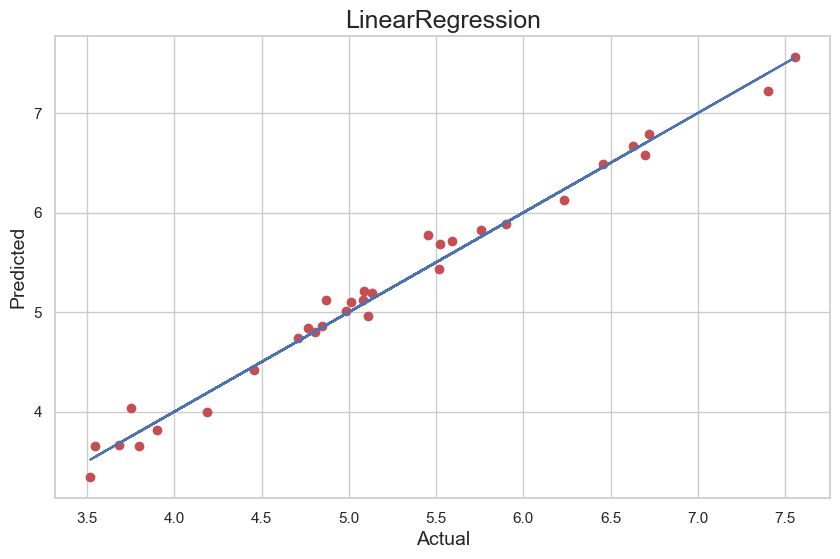



Results for RandomForestRegressor:
R2_score:  0.888222769230479
R2_score on training Data: 97.68457991563389
Mean Absolute Error:- 0.2994371875000004
Mean Squared Error:- 0.1297078355218752
Root Mean Squared Error:- 0.3601497404162263
Cross-validation scores: [-4.21649    -5.48165733 -6.26157953 -7.81076133 -9.57552609]
Mean Cross-validation score: -6.669202855559535
Difference between R2 score and cross-validation score is 755.7425624790014


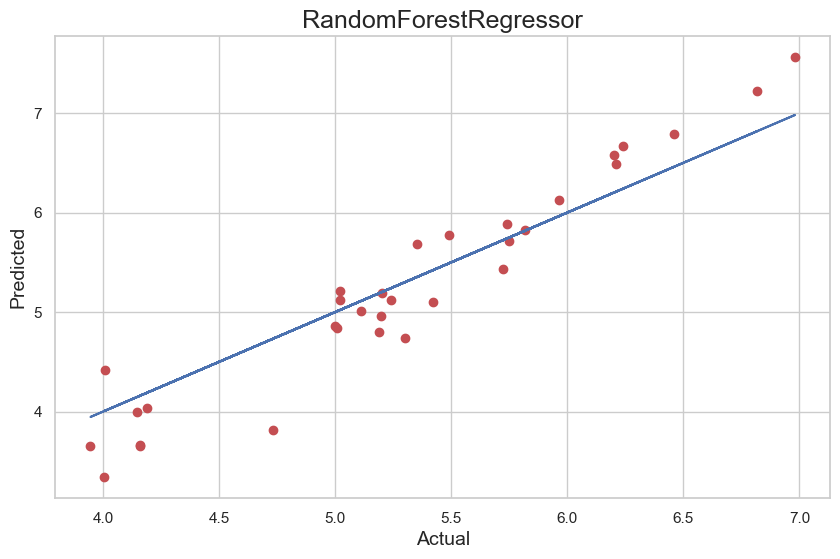



Results for DecisionTreeRegressor:
R2_score:  0.7915608764546267
R2_score on training Data: 100.0
Mean Absolute Error:- 0.4041874999999999
Mean Squared Error:- 0.24187562499999993
Root Mean Squared Error:- 0.4918085247329492
Cross-validation scores: [ -3.1430754  -22.91861902 -18.8710076  -18.45063642 -11.06179727]
Mean Cross-validation score: -14.889027139767782
Difference between R2 score and cross-validation score is 1568.058801622241


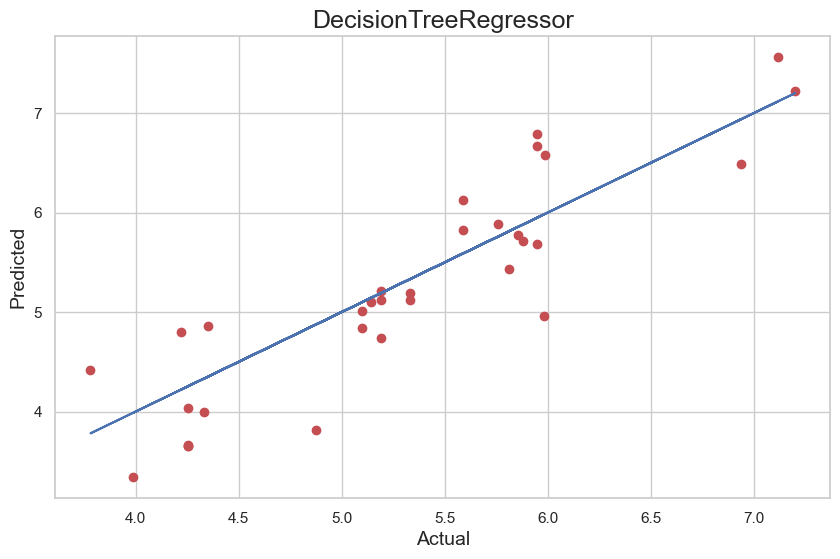



Results for KNeighborsRegressor:
R2_score:  0.4168988464243897
R2_score on training Data: 60.159466998688195
Mean Absolute Error:- 0.6835062499999998
Mean Squared Error:- 0.6766385962499999
Root Mean Squared Error:- 0.8225804497129748
Cross-validation scores: [ -7.64123243 -52.00822769 -14.88180561 -38.94251773 -22.78206967]
Mean Cross-validation score: -27.25117062470984
Difference between R2 score and cross-validation score is 2766.8069471134227


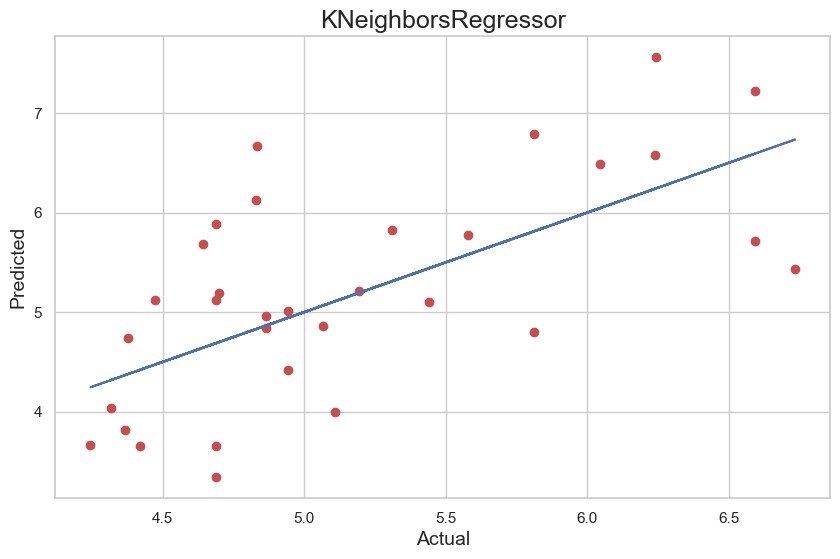



Results for Lasso:
R2_score:  0.7271703358233951
R2_score on training Data: 66.08251278727273
Mean Absolute Error:- 0.4692440062050853
Mean Squared Error:- 0.31659529371841477
Root Mean Squared Error:- 0.5626680137687007
Cross-validation scores: [ -4.71749288 -11.26884695 -16.06370183 -10.78261631  -9.61800144]
Mean Cross-validation score: -10.490131881033525
Difference between R2 score and cross-validation score is 1121.730221685692


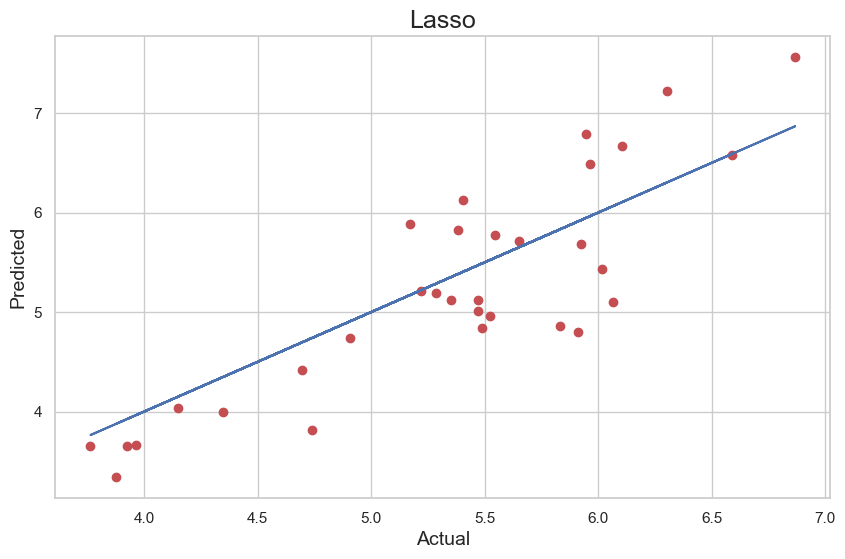



Results for Ridge:
R2_score:  0.9837274648495553
R2_score on training Data: 94.88466131290438
Mean Absolute Error:- 0.11175276107216658
Mean Squared Error:- 0.018882873535934302
Root Mean Squared Error:- 0.13741496838384928
Cross-validation scores: [ 0.5465019  -0.1639934  -0.71910664 -1.88362177  0.01117044]
Mean Cross-validation score: -0.44180989348779337
Difference between R2 score and cross-validation score is 142.55373583373486


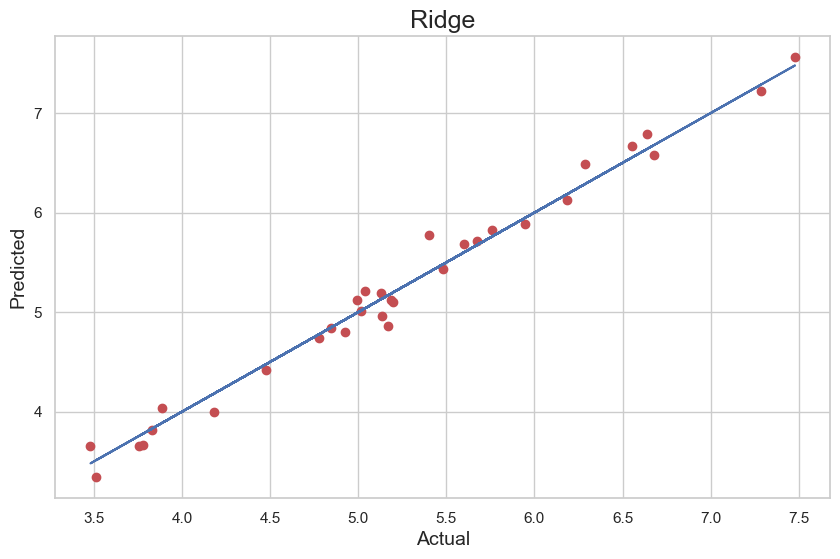

In [82]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNN(),
    Lasso(),
    Ridge()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # Evaluation
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train) * 100
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="r2")
    
    # Print results
    print(f"Results for {model_name}:")
    print('R2_score: ', r2_test)
    print('R2_score on training Data:', r2_train)
    print('Mean Absolute Error:-', mae)
    print('Mean Squared Error:-', mse)
    print("Root Mean Squared Error:-", rmse)
    
     # Cross-validation scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between R2 score and cross-validation score is", (r2_test - score.mean()) * 100)
    
    
    #plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x=y_pred, y=y_test, color='r')
    plt.plot(y_pred, y_pred, color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(model_name, fontsize=18)
    plt.show()
    
    print("\n" + "="*40 + "\n")

Linear Regression is the best model as we can see that the difference between R2 score and cross validation score is least.

In [85]:
param = {
    'fit_intercept': [True, False],
}

gscv = GridSearchCV(LinearRegression(), param, cv=5, n_jobs=-1)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]})

In [86]:
gscv.best_params_

{'fit_intercept': True}

In [87]:
Model=LinearRegression(fit_intercept= True)

In [88]:
Model.fit(x_train,y_train) 
pred=Model.predict(x_test)
print("R2_score: ",r2_score (y_test, pred))
print('Mean Absolute Error:-', mean_absolute_error(y_test, pred)) 
print('Mean Squared Error:-',mean_squared_error(y_test, pred))
print("Root Mean Squared Error:-", np.sqrt(mean_squared_error(y_test, pred)))


R2_score:  0.9857471904861963
Mean Absolute Error:- 0.10035069639138038
Mean Squared Error:- 0.016539156135948592
Root Mean Squared Error:- 0.1286046505222443


In [89]:
import joblib

In [90]:
import pickle
filename='WorldHappiness.pkl'
pickle.dump(Model, open(filename, 'wb'))